# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Dicapstone Webscrapping ini saya menggunakan website https://www.exchange-rates.org/history/IDR/USD/T dengan mengambil data tanggal dan harga. Tanggalnya saya ubah menjadi datetime64. Lalu untuk harganya saya ubah menjadi float64. Setelah itu, saya set_index dataframe tersebut agar harga dan tanggalnya menjadi index. Dan akhirnya saya membuat app.py dengan menggunakan flask untuk menghasilkan dashboard sederhana.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="A" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-26-2020">
     USD IDR rate for 11/26/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/25/2020
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/R


Do the scrapping process here (please change this markdown with your explanation)

In [5]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>]

In [6]:
import pandas as pd

In [7]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    harga = row.find_all('td')[2].text
    harga = harga.strip()
    
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    
    temp.append((harga, tanggal))
    #scrapping process
    
temp 

[('14,136.09929 IDR', '11/25/2020'),
 ('14,137.48161 IDR', '11/24/2020'),
 ('14,185.57119 IDR', '11/23/2020'),
 ('14,162.60519 IDR', '11/20/2020'),
 ('14,165.50144 IDR', '11/19/2020'),
 ('14,051.29503 IDR', '11/18/2020'),
 ('14,040.16051 IDR', '11/17/2020'),
 ('14,085.69501 IDR', '11/16/2020'),
 ('14,142.77143 IDR', '11/13/2020'),
 ('14,141.24303 IDR', '11/12/2020'),
 ('14,073.46024 IDR', '11/11/2020'),
 ('14,053.76135 IDR', '11/10/2020'),
 ('14,283.29667 IDR', '11/9/2020'),
 ('14,214.49744 IDR', '11/6/2020'),
 ('14,389.14027 IDR', '11/5/2020'),
 ('14,544.44634 IDR', '11/4/2020'),
 ('14,589.01774 IDR', '11/3/2020'),
 ('14,612.89990 IDR', '11/2/2020'),
 ('14,629.16216 IDR', '10/30/2020'),
 ('14,701.62361 IDR', '10/29/2020'),
 ('14,701.92586 IDR', '10/28/2020'),
 ('14,649.78960 IDR', '10/27/2020'),
 ('14,652.88010 IDR', '10/26/2020'),
 ('14,655.04157 IDR', '10/23/2020'),
 ('14,647.90877 IDR', '10/22/2020'),
 ('14,641.61060 IDR', '10/21/2020'),
 ('14,555.88071 IDR', '10/20/2020'),
 ('14,7

In [8]:
temp = temp[::-1]
temp

[('14,664.14584 IDR', '5/31/2020'),
 ('14,586.73900 IDR', '6/1/2020'),
 ('14,382.27395 IDR', '6/2/2020'),
 ('14,060.78946 IDR', '6/3/2020'),
 ('14,113.82802 IDR', '6/4/2020'),
 ('14,305.96407 IDR', '6/5/2020'),
 ('13,989.39489 IDR', '6/7/2020'),
 ('13,867.95377 IDR', '6/8/2020'),
 ('13,870.75718 IDR', '6/9/2020'),
 ('13,976.91611 IDR', '6/10/2020'),
 ('13,966.85142 IDR', '6/11/2020'),
 ('14,121.55442 IDR', '6/12/2020'),
 ('14,145.23543 IDR', '6/14/2020'),
 ('14,021.62200 IDR', '6/15/2020'),
 ('14,046.73959 IDR', '6/16/2020'),
 ('14,120.02241 IDR', '6/17/2020'),
 ('14,095.36729 IDR', '6/18/2020'),
 ('14,077.63950 IDR', '6/19/2020'),
 ('14,068.55627 IDR', '6/21/2020'),
 ('14,136.05128 IDR', '6/22/2020'),
 ('14,148.27391 IDR', '6/23/2020'),
 ('14,143.17320 IDR', '6/24/2020'),
 ('14,130.57047 IDR', '6/25/2020'),
 ('14,190.21303 IDR', '6/26/2020'),
 ('14,185.08225 IDR', '6/28/2020'),
 ('14,183.53912 IDR', '6/29/2020'),
 ('14,296.90560 IDR', '6/30/2020'),
 ('14,256.13040 IDR', '7/1/2020'),
 

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns=('harga', 'tanggal'))
df.head()

,harga,tanggal
0,"14,664.14584 IDR",5/31/2020
1,"14,586.73900 IDR",6/1/2020
2,"14,382.27395 IDR",6/2/2020
3,"14,060.78946 IDR",6/3/2020
4,"14,113.82802 IDR",6/4/2020


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [10]:
df['harga'] = df['harga'].str.replace(" IDR","")
df['harga'] = df['harga'].str.replace(",","").astype('float64')
df['tanggal'] = df['tanggal'].astype('datetime64')
df.head()

,harga,tanggal
0,14664.14584,2020-05-31
1,14586.73900,2020-06-01
2,14382.27395,2020-06-02
3,14060.78946,2020-06-03
4,14113.82802,2020-06-04


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='tanggal'>

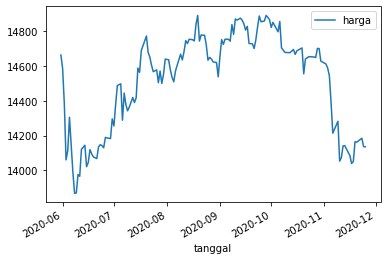

In [11]:
df.set_index('tanggal').plot()

Kesimpulan dari webscrapping ini adalah setiap tanggal mengalami penurunan dan peningkatan yang begitu ekstrim. Penurunan yang begitu ekstrim juga terjadi pada bulan desember. Peningkatan tersebut mengakibatkan bahwa harga penjualan IDR sangat mahal.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.